In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Earlier having around 5LAC rows, after sampling having around 1.33LAC rows:
df = pd.read_csv("/Users/shailesh/Desktop/00 Python/train_indessa.csv").sample(frac=.25,random_state=0).reset_index()
df = df.drop(["index"],axis=1)
pd.set_option('max_columns',500)
pd.set_option('max_rows',500)
print(df.shape)
df.head()

(133107, 43)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,42802624,5000,5000,5000.0,36 months,BAT4694572,13.66,C,C3,1 year,RENT,43000.0,Source Verified,n,NaN,other,144xx,NY,11.47,0.0,1.0,71.0,NaN,14.0,0.0,1782.0,13.9,17.0,w,553.87,0.0,0.0,0.0,0.0,71.0,INDIVIDUAL,NaN,52th week,0.0,0.0,23756.0,12800.0,0
1,2631928,5800,5800,5800.0,36 months,BAT5547201,14.33,C,C1,2 years,RENT,62550.0,Not Verified,n,> Hi like a lot of people I have too many c...,credit_card,927xx,CA,3.32,1.0,0.0,5.0,NaN,8.0,0.0,4901.0,30.8,20.0,f,267.48,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,4901.0,15900.0,1
2,46576841,6000,6000,6000.0,36 months,NaN,9.99,B,B3,NaN,MORTGAGE,55648.1,Verified,n,NaN,home_improvement,484xx,MI,34.35,2.0,0.0,16.0,116.0,7.0,1.0,4540.0,69.8,18.0,f,441.15,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,284655.0,6500.0,0
3,59712869,16500,16500,16500.0,60 months,BAT1780517,12.29,C,C1,3 years,MORTGAGE,50000.0,Verified,n,NaN,debt_consolidation,350xx,AL,4.08,2.0,0.0,15.0,NaN,13.0,0.0,425.0,7.9,30.0,w,812.92,0.0,0.0,0.0,0.0,32.0,INDIVIDUAL,NaN,22th week,0.0,0.0,233143.0,5400.0,0
4,17842960,29900,29900,29900.0,60 months,BAT2136391,17.57,D,D2,5 years,MORTGAGE,65000.0,Not Verified,n,NaN,debt_consolidation,477xx,IN,30.59,1.0,0.0,4.0,NaN,14.0,0.0,37031.0,75.8,42.0,w,7798.91,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,87th week,0.0,0.0,203017.0,45600.0,0


In [2]:
#Removing unwanted column from dataset:
df.drop(["member_id", "batch_enrolled"],axis=1,inplace=True)
df.shape

(133107, 41)

In [3]:
'''1.Data Cleaning'''

df["term"].replace(to_replace=" months", value='', regex=True, inplace=True)
df["term"]=pd.to_numeric(df["term"], errors="coerce")

'''
df["sub_grade"].replace(to_replace="A", value=0, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="B", value=1, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="C", value=2, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="D", value=3, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="E", value=4, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="F", value=5, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="G", value=6, regex=True, inplace=True)
df["sub_grade"]=pd.to_numeric(df["sub_grade"], errors="coerce")
'''

df["emp_length"].replace("n/a", 0, inplace=True)
df["emp_length"].replace(to_replace="\+ years", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace=" years", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace=" year", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace="< 1", value= 0, regex=True, inplace=True)
df["emp_length"]=pd.to_numeric(df["emp_length"], errors="coerce")

df["verification_status"].replace(to_replace="Source ",value='',regex=True, inplace=True)

df["zip_code"].replace(to_replace="xx", value='', regex=True, inplace=True)
df["zip_code"]=pd.to_numeric(df["zip_code"], errors="coerce")

df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

print('Transformation Done')
print(df.shape)
df.head()

Transformation Done
(133107, 41)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,5000,5000,5000.0,36,13.66,C,C3,1.0,RENT,43000.0,Verified,n,NaN,other,144,NY,11.47,0.0,1.0,71.0,NaN,14.0,0.0,1782.0,13.9,17.0,w,553.87,0.0,0.0,0.0,0.0,71.0,INDIVIDUAL,NaN,52.0,0.0,0.0,23756.0,12800.0,0
1,5800,5800,5800.0,36,14.33,C,C1,2.0,RENT,62550.0,Not Verified,n,> Hi like a lot of people I have too many c...,credit_card,927,CA,3.32,1.0,0.0,5.0,NaN,8.0,0.0,4901.0,30.8,20.0,f,267.48,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22.0,0.0,0.0,4901.0,15900.0,1
2,6000,6000,6000.0,36,9.99,B,B3,NaN,MORTGAGE,55648.1,Verified,n,NaN,home_improvement,484,MI,34.35,2.0,0.0,16.0,116.0,7.0,1.0,4540.0,69.8,18.0,f,441.15,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,44.0,0.0,0.0,284655.0,6500.0,0
3,16500,16500,16500.0,60,12.29,C,C1,3.0,MORTGAGE,50000.0,Verified,n,NaN,debt_consolidation,350,AL,4.08,2.0,0.0,15.0,NaN,13.0,0.0,425.0,7.9,30.0,w,812.92,0.0,0.0,0.0,0.0,32.0,INDIVIDUAL,NaN,22.0,0.0,0.0,233143.0,5400.0,0
4,29900,29900,29900.0,60,17.57,D,D2,5.0,MORTGAGE,65000.0,Not Verified,n,NaN,debt_consolidation,477,IN,30.59,1.0,0.0,4.0,NaN,14.0,0.0,37031.0,75.8,42.0,w,7798.91,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,87.0,0.0,0.0,203017.0,45600.0,0


In [4]:
#Checking distribution of target variable "y":
#To check whether data is balanced or imbalanced, as we can see our data is balanced.
cnt = df['loan_status'].value_counts()
total_cnt = cnt[0]+cnt[1]
T_per = (cnt[1]/total_cnt)*100
F_per = (cnt[0]/total_cnt)*100
print("Count of True is:",cnt[1],"and Perctange of True is:",T_per)
print("Count of False is:",cnt[0],"and Perctange of False is:",F_per)

Count of True is: 31583 and Perctange of True is: 23.727527477893727
Count of False is: 101524 and Perctange of False is: 76.27247252210627


Count of 0: 101524
Count of 1: 31583
1    101524
0    101524
Name: loan_status, dtype: int64


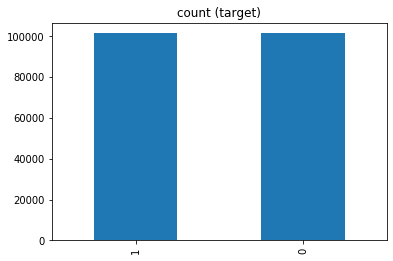

In [5]:
#Separating both classes:
class_0 = df[df['loan_status'] == 0]
class_1 = df[df['loan_status'] == 1]

class_count_0, class_count_1 = df['loan_status'].value_counts()
print("Count of 0:",class_count_0) 
print("Count of 1:",class_count_1)

#Over Sampling:
class_1_over = class_1.sample(class_count_0, replace=True)
dfo = pd.concat([class_1_over, class_0], axis=0)

print(dfo['loan_status'].value_counts())
#Plot the count after under-sampling:
dfo['loan_status'].value_counts().plot(kind='bar', title='count (target)')

In [6]:
#So our new dataset after under sampling:
dfo.reset_index(inplace=True)
dfo = dfo.drop(["index"],axis=1)
print(dfo.shape)
dfo.head()

(203048, 41)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,12000,12000,11975.0,36,9.49,B,B2,10.0,MORTGAGE,85000.0,Verified,n,NaN,debt_consolidation,334,FL,7.86,1.0,2.0,20.0,NaN,13.0,0.0,8792.0,14.2,30.0,f,762.03,0.0,0.0,0.0,0.0,30.0,INDIVIDUAL,NaN,39.0,0.0,2191.0,17346.0,62000.0,1
1,16750,16750,16725.0,36,13.67,B,B5,NaN,RENT,70000.0,Verified,n,NaN,debt_consolidation,871,NM,10.30,0.0,1.0,NaN,NaN,9.0,0.0,13492.0,59.7,12.0,f,2314.32,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,65.0,0.0,100.0,17858.0,22600.0,1
2,10000,10000,10000.0,36,6.39,A,A2,10.0,MORTGAGE,89000.0,Not Verified,n,NaN,credit_card,109,NY,5.53,0.0,0.0,NaN,NaN,11.0,0.0,362.0,4.8,18.0,w,155.79,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,26.0,0.0,0.0,136714.0,7500.0,1
3,22325,22325,22325.0,60,21.99,E,E4,5.0,MORTGAGE,49774.0,Verified,n,NaN,debt_consolidation,144,NY,12.01,0.0,0.0,50.0,NaN,9.0,0.0,16385.0,94.0,13.0,w,5599.37,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,61.0,0.0,0.0,90607.0,17460.0,1
4,6000,6000,6000.0,36,10.37,B,B3,2.0,MORTGAGE,78000.0,Not Verified,n,> Using funds to pay off credit cards to br...,debt_consolidation,850,AZ,9.55,0.0,0.0,NaN,85.0,12.0,1.0,11656.0,84.5,26.0,f,1006.25,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,161.0,0.0,NaN,NaN,NaN,1


In [7]:
#Checking for null values, it shows percerntage of null values in that column:
null = dfo.isnull().sum()
null_per = (null/len(dfo))*100
null_per

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_length                      4.520113
home_ownership                  0.000000
annual_inc                      0.000985
verification_status             0.000000
pymnt_plan                      0.000000
desc                           78.527737
purpose                         0.000000
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.002955
inq_last_6mths                  0.002955
mths_since_last_delinq         52.846125
mths_since_last_record         85.345337
open_acc                        0.002955
pub_rec                         0.002955
revol_bal                       0.000000
revol_util      

In [8]:
#Deleting the 4 columns having more than 75% missing values:
dfo.drop(["desc","mths_since_last_record","mths_since_last_major_derog","verification_status_joint"],axis=1,inplace=True)
print(dfo.shape)

(203048, 37)


In [9]:
#Analysing the remaining columns from our dataset:
pd.set_option('display.float_format', '{:.5f}'.format)
des = dfo.describe()
print(des)

         loan_amnt  funded_amnt  funded_amnt_inv         term     int_rate  \
count 203048.00000 203048.00000     203048.00000 203048.00000 203048.00000   
mean   14233.21899  14206.15716      14143.02569     42.31346     13.26928   
std     8333.21754   8320.12930       8342.49661     10.56711      4.33623   
min      500.00000    500.00000          0.00000     36.00000      5.32000   
25%     8000.00000   8000.00000       8000.00000     36.00000      9.99000   
50%    12000.00000  12000.00000      12000.00000     36.00000     12.99000   
75%    20000.00000  20000.00000      19950.00000     60.00000     15.99000   
max    35000.00000  35000.00000      35000.00000     60.00000     28.99000   

        emp_length    annual_inc     zip_code          dti  delinq_2yrs  \
count 193870.00000  203046.00000 203048.00000 203048.00000 203042.00000   
mean       5.95052   74309.87347    515.97551     17.47137      0.28448   
std        3.65477   58913.34488    315.51802      8.18780      0.80508 

In [ ]:
#Below variables are also having more than 50% values as "0" but we can't delete all of them as they may be significant or not:

#"delinq_2yrs", "inq_last_6mths", "pub_rec", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt"

In [10]:
#Now checking Mutlicollinearity between variables and removing it using PCA.
#Before applying PCA, MVT and Outlier treatment is required to be performed.

#Selecting numerical variables for outlier detection:
df1 = dfo._get_numeric_data()
df1.drop(['loan_status'], axis=1, inplace=True)
print(df1.shape)
df1.head()

(203048, 27)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,12000,12000,11975.00000,36,9.49000,10.00000,85000.00000,334,7.86000,1.00000,2.00000,20.00000,13.00000,0.00000,8792.00000,14.20000,30.00000,762.03000,0.00000,0.00000,0.00000,0.00000,39.00000,0.00000,2191.00000,17346.00000,62000.00000
1,16750,16750,16725.00000,36,13.67000,nan,70000.00000,871,10.30000,0.00000,1.00000,nan,9.00000,0.00000,13492.00000,59.70000,12.00000,2314.32000,0.00000,0.00000,0.00000,0.00000,65.00000,0.00000,100.00000,17858.00000,22600.00000
2,10000,10000,10000.00000,36,6.39000,10.00000,89000.00000,109,5.53000,0.00000,0.00000,nan,11.00000,0.00000,362.00000,4.80000,18.00000,155.79000,0.00000,0.00000,0.00000,0.00000,26.00000,0.00000,0.00000,136714.00000,7500.00000
3,22325,22325,22325.00000,60,21.99000,5.00000,49774.00000,144,12.01000,0.00000,0.00000,50.00000,9.00000,0.00000,16385.00000,94.00000,13.00000,5599.37000,0.00000,0.00000,0.00000,0.00000,61.00000,0.00000,0.00000,90607.00000,17460.00000
4,6000,6000,6000.00000,36,10.37000,2.00000,78000.00000,850,9.55000,0.00000,0.00000,nan,12.00000,1.00000,11656.00000,84.50000,26.00000,1006.25000,0.00000,0.00000,0.00000,0.00000,161.00000,0.00000,nan,nan,nan


In [11]:
#Now checking for skewness for all numeric variables before outlier treatment
#For no skewness, it should range from -1 to +1:

skewness1 = df1.skew()
skewness1

loan_amnt                     0.74898
funded_amnt                   0.75331
funded_amnt_inv               0.74969
term                          1.07628
int_rate                      0.41421
emp_length                   -0.21886
annual_inc                   39.03857
zip_code                      0.03198
dti                           0.68725
delinq_2yrs                   5.53175
inq_last_6mths                2.23952
mths_since_last_delinq        0.43185
open_acc                      1.19314
pub_rec                      13.04270
revol_bal                    11.70521
revol_util                   -0.17653
total_acc                     0.83734
total_rec_int                 2.77706
total_rec_late_fee           16.64253
recoveries                   21.45180
collection_recovery_fee      32.18706
collections_12_mths_ex_med   12.52039
last_week_pay                 0.86232
acc_now_delinq               18.81167
tot_coll_amt                 64.48901
tot_cur_bal                   2.45008
total_rev_hi

In [12]:
#Outlier Detection:

#Getting details of each variable:
des1 = df1.describe().round().T
#Setting upper and lower limit:
Q1 = df1.quantile(0.5)
Q3 = df1.quantile(0.95)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
#Checking for outliers:
outlier = np.where((df1<lower_limit)|(df1>upper_limit))
#Additional parameters:
des2 = pd.DataFrame({"IQR":IQR, "LL":lower_limit, "UL":upper_limit, "Skewness":skewness1})
#Creating outlier frame for further analysis:
outlier_frame = pd.concat([des1,des2],axis=1)
outlier_frame

,count,mean,std,min,25%,50%,75%,max,IQR,LL,UL,Skewness
loan_amnt,203048.00000,14233.00000,8333.00000,500.00000,8000.00000,12000.00000,20000.00000,35000.00000,19000.00000,-16500.00000,59500.00000,0.74898
funded_amnt,203048.00000,14206.00000,8320.00000,500.00000,8000.00000,12000.00000,20000.00000,35000.00000,18750.00000,-16125.00000,58875.00000,0.75331
funded_amnt_inv,203048.00000,14143.00000,8342.00000,0.00000,8000.00000,12000.00000,19950.00000,35000.00000,18750.00000,-16125.00000,58875.00000,0.74969
term,203048.00000,42.00000,11.00000,36.00000,36.00000,36.00000,60.00000,60.00000,24.00000,0.00000,96.00000,1.07628
int_rate,203048.00000,13.00000,4.00000,5.00000,10.00000,13.00000,16.00000,29.00000,8.00000,0.99000,32.99000,0.41421
emp_length,193870.00000,6.00000,4.00000,0.00000,3.00000,6.00000,10.00000,10.00000,4.00000,0.00000,16.00000,-0.21886
annual_inc,203046.00000,74310.00000,58913.00000,1896.00000,45000.00000,64000.00000,90000.00000,8500021.00000,86000.00000,-65000.00000,279000.00000,39.03857
zip_code,203048.00000,516.00000,316.00000,8.00000,225.00000,481.00000,812.00000,999.00000,476.00000,-233.00000,1671.00000,0.03198
dti,203048.00000,17.00000,8.00000,0.00000,11.00000,17.00000,23.00000,381.00000,14.77000,-5.13500,53.94500,0.68725
delinq_2yrs,203042.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,27.00000,2.00000,-3.00000,5.00000,5.53175


In [13]:
#Selecting the desired columns for capping and flooring:
X1 = df1.loc[:,["annual_inc", "pub_rec", "revol_bal", "tot_coll_amt"]]

'''Capping: replacing all values higher than upper limit will be replaced by upper limit itself'''
up = upper_limit[["annual_inc", "pub_rec", "revol_bal", "tot_coll_amt"]]                     #To cap some required values
X11 = np.where(X1>up, up, X1)

'''Flooring means replacing all values less than lower limit will be replaced by lower limit itself'''
#But in our dataset no values are lower than lower limit, so no need of flooring
#X11 = np.where(X1<low, low, X1)

#Converting X11 into a dataframe:
X11 = pd.DataFrame(X11)
#Renaming columns of dataframe "X11":
X11.columns = ["annual_inc", "pub_rec", "revol_bal", "tot_coll_amt" ]

#If capping and flooring all variables:
#up = upper_limit 
#low = lower_limit     
#X11.columns = X1.columns.values

#Updating values in dataframe after outlier detection:
df1.update(X11)

#Checking for skewness after doing outlier detection:
skewness = df1.skew()
print(skewness)

#Note:
#As we can see even after outlier detection, there are variables having large skewness values
#This is because these variables are having Upper Limit(UL) as "0" because 50% values are zero in these variables
#And if we replace these values with UL then these variables will have almost all values as "0".

print("Outlier Detection Done")

loan_amnt                     0.74898
funded_amnt                   0.75331
funded_amnt_inv               0.74969
term                          1.07628
int_rate                      0.41421
emp_length                   -0.21886
annual_inc                    1.91915
zip_code                      0.03198
dti                           0.68725
delinq_2yrs                   5.53175
inq_last_6mths                2.23952
mths_since_last_delinq        0.43185
open_acc                      1.19314
pub_rec                       2.82364
revol_bal                     2.36981
revol_util                   -0.17653
total_acc                     0.83734
total_rec_int                 2.77706
total_rec_late_fee           16.64253
recoveries                   21.45180
collection_recovery_fee      32.18706
collections_12_mths_ex_med   12.52039
last_week_pay                 0.86232
acc_now_delinq               18.81167
tot_coll_amt                  4.10941
tot_cur_bal                   2.45008
total_rev_hi

In [14]:
'''Missing Value Treatment:'''

#Checking mssing values in each column:
print(df1.isnull().sum())

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
emp_length                      9178
annual_inc                         2
zip_code                           0
dti                                0
delinq_2yrs                        6
inq_last_6mths                     6
mths_since_last_delinq        107303
open_acc                           6
pub_rec                            6
revol_bal                          0
revol_util                       103
total_acc                          6
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
collections_12_mths_ex_med        48
last_week_pay                   2621
acc_now_delinq                     6
tot_coll_amt                   29105
tot_cur_bal                    29105
total_rev_hi_lim               29105
d

In [15]:
#Replacing missing values using Imputer:

from sklearn.impute import SimpleImputer
import numpy as np
#Columns  are having skewness, so we will use "median" as imputer:
impute = SimpleImputer(missing_values=np.nan, strategy="median")
df1.loc[:,["annual_inc", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]] = impute.fit_transform(df1.loc[:,["annual_inc", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]])
#Columns  are having no skewness, so we will use "mean" as imputer:
impute = SimpleImputer(missing_values=np.nan, strategy="mean")
df1.loc[:,["emp_length", "revol_util", "total_acc", "last_week_pay","mths_since_last_delinq"]] = impute.fit_transform(df1.loc[:,["emp_length", "revol_util", "total_acc", "last_week_pay","mths_since_last_delinq"]])

In [16]:
#Now again checking missing values in each column after MVT:
print("No. of Null values in dataset after MVT:",df1.isnull().sum().sum())
print("Missing Value Treatment Done")

No. of Null values in dataset after MVT: 0
Missing Value Treatment Done


In [ ]:
'''*******************************************************************************
             Checking Multi-colinearity and Using PCA for removing it
*******************************************************************************'''

In [17]:
#Standard scaling before doing PCA:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df11 = sc.fit_transform(df1)
df11 = pd.DataFrame(df11)
print(df11.shape)
df11.head()

(203048, 27)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,-0.26799,-0.26516,-0.25988,-0.59746,-0.87156,1.13392,0.28133,-0.57675,-1.17387,0.88878,1.17865,-0.96495,0.31819,-0.38192,-0.47077,-1.67235,0.40067,-0.50266,-0.09685,-0.08931,-0.06217,-0.09528,-0.54581,-0.06087,5.40315,-0.80778,1.08704
1,0.30202,0.30575,0.30950,-0.59746,0.09241,0.00000,-0.07932,1.12521,-0.87586,-0.35335,0.23263,-0.00000,-0.45370,-0.38192,-0.15117,0.21506,-1.12306,0.24810,-0.09685,-0.08931,-0.06217,-0.09528,-0.00559,-0.06087,0.14169,-0.80418,-0.26672
2,-0.50799,-0.50554,-0.49662,-0.59746,-1.58647,1.13392,0.37750,-1.28987,-1.45844,-0.35335,-0.71340,-0.00000,-0.06775,-0.38192,-1.04400,-2.06227,-0.61515,-0.79586,-0.09685,-0.08931,-0.06217,-0.09528,-0.81593,-0.06087,-0.25995,0.03177,-0.78554
3,0.97103,0.97581,0.98076,1.67374,2.01114,-0.26616,-0.56562,-1.17894,-0.66702,-0.35335,-0.71340,1.03137,-0.45370,-0.38192,0.04555,1.63787,-1.03840,1.83690,-0.09685,-0.08931,-0.06217,-0.09528,-0.08870,-0.06087,-0.25995,-0.29251,-0.44332
4,-0.98800,-0.98630,-0.97609,-0.59746,-0.66862,-1.10621,0.11302,1.05866,-0.96746,-0.35335,-0.71340,-0.00000,0.12522,1.88032,-0.27602,1.24379,0.06206,-0.38454,-0.09685,-0.08931,-0.06217,-0.09528,1.98909,-0.06087,-0.25995,-0.34756,-0.23923


In [18]:
#Renaming columns:
df11.columns=df1.columns.values
df11.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-0.26799,-0.26516,-0.25988,-0.59746,-0.87156,1.13392,0.28133,-0.57675,-1.17387,0.88878,1.17865,-0.96495,0.31819,-0.38192,-0.47077,-1.67235,0.40067,-0.50266,-0.09685,-0.08931,-0.06217,-0.09528,-0.54581,-0.06087,5.40315,-0.80778,1.08704
1,0.30202,0.30575,0.30950,-0.59746,0.09241,0.00000,-0.07932,1.12521,-0.87586,-0.35335,0.23263,-0.00000,-0.45370,-0.38192,-0.15117,0.21506,-1.12306,0.24810,-0.09685,-0.08931,-0.06217,-0.09528,-0.00559,-0.06087,0.14169,-0.80418,-0.26672
2,-0.50799,-0.50554,-0.49662,-0.59746,-1.58647,1.13392,0.37750,-1.28987,-1.45844,-0.35335,-0.71340,-0.00000,-0.06775,-0.38192,-1.04400,-2.06227,-0.61515,-0.79586,-0.09685,-0.08931,-0.06217,-0.09528,-0.81593,-0.06087,-0.25995,0.03177,-0.78554
3,0.97103,0.97581,0.98076,1.67374,2.01114,-0.26616,-0.56562,-1.17894,-0.66702,-0.35335,-0.71340,1.03137,-0.45370,-0.38192,0.04555,1.63787,-1.03840,1.83690,-0.09685,-0.08931,-0.06217,-0.09528,-0.08870,-0.06087,-0.25995,-0.29251,-0.44332
4,-0.98800,-0.98630,-0.97609,-0.59746,-0.66862,-1.10621,0.11302,1.05866,-0.96746,-0.35335,-0.71340,-0.00000,0.12522,1.88032,-0.27602,1.24379,0.06206,-0.38454,-0.09685,-0.08931,-0.06217,-0.09528,1.98909,-0.06087,-0.25995,-0.34756,-0.23923


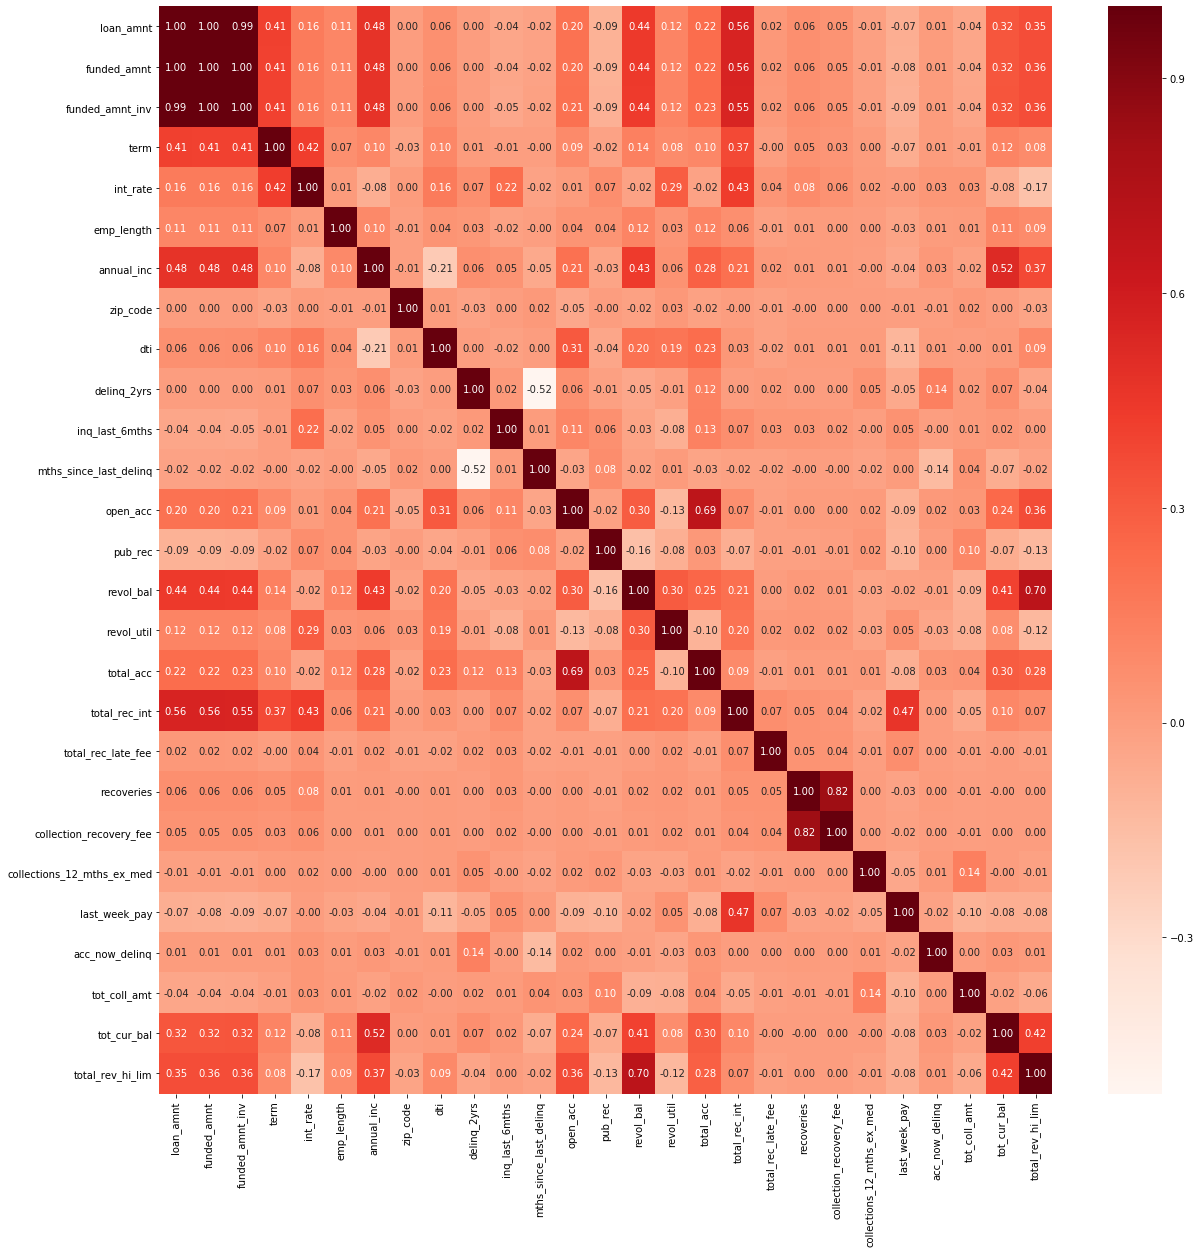

In [19]:
#Ploting multicolinearity between all columns:

import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sb.heatmap(df11.corr(), annot=True, cmap= plt.cm.Reds, fmt='.2f')
plt.show()

In [20]:
#In our model we want to replace all the variables having mulit-colinearity into one vaiable,
#so we don't require elbow method and can do in on step as shown below
'''
#Below columns are having high multi-collinearity between them:
["loan_amnt", "funded_amnt", "funded_amnt_inv"]
["recoveries", "collection_recovery_fee"]
'''

#Now applying PCA on ["loan_amnt", "funded_amnt", "funded_amnt_inv"]:
from sklearn.decomposition.pca import PCA
X = df11.loc[:,["loan_amnt", "funded_amnt", "funded_amnt_inv"]]
df11.drop(["loan_amnt", "funded_amnt", "funded_amnt_inv"], axis=1, inplace=True)
pca = PCA(n_components=1)
X1 = pd.DataFrame(pca.fit_transform(X))
df11["new1"] = X1[0]
pd.options.display.float_format = '{:.2f}'.format
print(df11.shape)
df11.head()

(203048, 25)


,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new1
0,-0.60,-0.87,1.13,0.28,-0.58,-1.17,0.89,1.18,-0.96,0.32,-0.38,-0.47,-1.67,0.40,-0.50,-0.10,-0.09,-0.06,-0.10,-0.55,-0.06,5.40,-0.81,1.09,-0.46
1,-0.60,0.09,0.00,-0.08,1.13,-0.88,-0.35,0.23,-0.00,-0.45,-0.38,-0.15,0.22,-1.12,0.25,-0.10,-0.09,-0.06,-0.10,-0.01,-0.06,0.14,-0.80,-0.27,0.53
2,-0.60,-1.59,1.13,0.38,-1.29,-1.46,-0.35,-0.71,-0.00,-0.07,-0.38,-1.04,-2.06,-0.62,-0.80,-0.10,-0.09,-0.06,-0.10,-0.82,-0.06,-0.26,0.03,-0.79,-0.87
3,1.67,2.01,-0.27,-0.57,-1.18,-0.67,-0.35,-0.71,1.03,-0.45,-0.38,0.05,1.64,-1.04,1.84,-0.10,-0.09,-0.06,-0.10,-0.09,-0.06,-0.26,-0.29,-0.44,1.69
4,-0.60,-0.67,-1.11,0.11,1.06,-0.97,-0.35,-0.71,-0.00,0.13,1.88,-0.28,1.24,0.06,-0.38,-0.10,-0.09,-0.06,-0.10,1.99,-0.06,-0.26,-0.35,-0.24,-1.70


In [21]:
#Now applying PCA on ["recoveries", "collection_recovery_fee"]:
from sklearn.decomposition.pca import PCA
X = df11.loc[:,["recoveries", "collection_recovery_fee"]]
df11.drop(["recoveries", "collection_recovery_fee"], axis=1, inplace=True)
pca = PCA(n_components=1)
X1 = pd.DataFrame(pca.fit_transform(X))
df11["new3"] = X1[0]
pd.options.display.float_format = '{:.2f}'.format
print(df11.shape)
df11.head()

(203048, 24)


,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new1,new3
0,-0.60,-0.87,1.13,0.28,-0.58,-1.17,0.89,1.18,-0.96,0.32,-0.38,-0.47,-1.67,0.40,-0.50,-0.10,-0.10,-0.55,-0.06,5.40,-0.81,1.09,-0.46,-0.11
1,-0.60,0.09,0.00,-0.08,1.13,-0.88,-0.35,0.23,-0.00,-0.45,-0.38,-0.15,0.22,-1.12,0.25,-0.10,-0.10,-0.01,-0.06,0.14,-0.80,-0.27,0.53,-0.11
2,-0.60,-1.59,1.13,0.38,-1.29,-1.46,-0.35,-0.71,-0.00,-0.07,-0.38,-1.04,-2.06,-0.62,-0.80,-0.10,-0.10,-0.82,-0.06,-0.26,0.03,-0.79,-0.87,-0.11
3,1.67,2.01,-0.27,-0.57,-1.18,-0.67,-0.35,-0.71,1.03,-0.45,-0.38,0.05,1.64,-1.04,1.84,-0.10,-0.10,-0.09,-0.06,-0.26,-0.29,-0.44,1.69,-0.11
4,-0.60,-0.67,-1.11,0.11,1.06,-0.97,-0.35,-0.71,-0.00,0.13,1.88,-0.28,1.24,0.06,-0.38,-0.10,-0.10,1.99,-0.06,-0.26,-0.35,-0.24,-1.70,-0.11


In [22]:
#Now checking multicolinearity for categorical variables:

df2 = dfo.select_dtypes(include=["object"])
print(df2.shape)
df2.head()

(203048, 9)


,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,B,B2,MORTGAGE,Verified,n,debt_consolidation,FL,f,INDIVIDUAL
1,B,B5,RENT,Verified,n,debt_consolidation,NM,f,INDIVIDUAL
2,A,A2,MORTGAGE,Not Verified,n,credit_card,NY,w,INDIVIDUAL
3,E,E4,MORTGAGE,Verified,n,debt_consolidation,NY,w,INDIVIDUAL
4,B,B3,MORTGAGE,Not Verified,n,debt_consolidation,AZ,f,INDIVIDUAL


In [23]:
#Checking Missing values in categorical columns:
print(df2.isnull().sum())

#No missing values

grade                  0
sub_grade              0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
addr_state             0
initial_list_status    0
application_type       0
dtype: int64


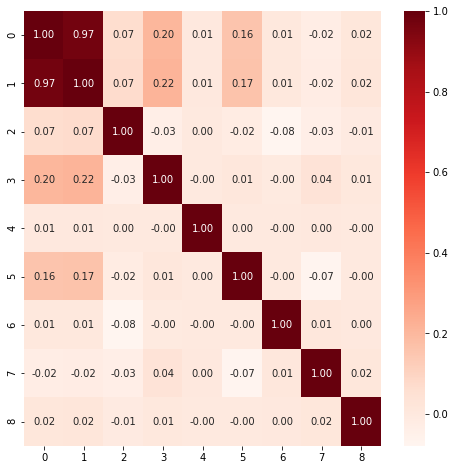

In [39]:
#Using "Spearman rank correlation coefficient" for categorical variables:
from scipy import stats
cor, p = stats.spearmanr(df2) 
#"corr" is correlation and "p" is p-value

#Ploting coefficients to check multi-colinearity: 
plt.figure(figsize=(8,8))
sb.heatmap(cor, annot=True, cmap= plt.cm.Reds, fmt='.2f')
plt.show()

#No categorical variable is having Mutli-colinearity

In [24]:
#"grade" and "sub-grade" are having multi-collineairty because they will show same information i.e postion of customer, 
#So we will drop "grade" and take forward only "sub-grade" in our model.

df2.drop(["grade"],axis=1,inplace=True)

In [25]:
#Checking number of categories/classes in each categorical variable:
for i in df2.columns:
    print(i,":",len(df2[i].unique()))

sub_grade : 35
home_ownership : 6
verification_status : 2
pymnt_plan : 2
purpose : 14
addr_state : 51
initial_list_status : 2
application_type : 2


In [26]:
#Combining low frequency classes into one named as "other":
#(series/series.sum()*100) gives percentage of each class
#.lt(1) means less than 1 (It means columns having mask<1, will become True and rest will become False)

#Only taking categories with count almost 1000 or more and rest combined in "Other"
series = pd.value_counts(df2["addr_state"])
mask = (series/series.sum()*100).lt(1.51)    
df2["addr_state"] = np.where(df2["addr_state"].isin(series[mask].index),"Other",df2["addr_state"])
#Now all categories having low frequency are combined in "Other":
print(df2["addr_state"].value_counts().sort_values(ascending=False))

Other    38921
CA       31190
NY       16918
TX       16433
FL       13981
IL        7945
NJ        7740
PA        7121
OH        6646
GA        6465
VA        5924
NC        5456
MI        4927
MA        4865
AZ        4864
MD        4797
CO        4453
WA        4437
MN        3647
MO        3238
CT        3080
Name: addr_state, dtype: int64


In [27]:
#Combining low frequency classes into one named as "other":
#(series/series.sum()*100) gives percentage of each class
#.lt(1) means less than 1 (It means columns having mask<1, will become True and rest will become False)

#Only taking categories with count almost 1000 or more and rest combined in "Other"
series = pd.value_counts(df2["sub_grade"])
mask = (series/series.sum()*100).lt(2.1)    
df2["sub_grade"] = np.where(df2["sub_grade"].isin(series[mask].index),"Other",df2["sub_grade"])
#Now all categories having low frequency are combined in "Other":
print(df2["sub_grade"].value_counts().sort_values(ascending=False))

Other    21490
B3       13580
B4       12880
C1       12464
C2       11986
B2       11841
B5       11503
C3       11228
A5       10318
C4       10311
B1       10255
C5        9054
A4        8578
D1        8026
D2        6814
D3        5964
A3        5756
D4        5639
A2        5389
A1        5234
D5        4738
Name: sub_grade, dtype: int64


In [28]:
#Now checking:
for i in df2.columns:
    print(i,":",len(df2[i].unique()))
    
print(pd.get_dummies(df2,drop_first=True).shape)

sub_grade : 21
home_ownership : 6
verification_status : 2
pymnt_plan : 2
purpose : 14
addr_state : 21
initial_list_status : 2
application_type : 2
(203048, 62)


In [29]:
'''3. Using pd.get_dummies'''
cat_vars = list(df2.columns)
for var in cat_vars:    
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df2[var], prefix=var)
    df3=df2.join(cat_list)
    df2=df3
    
df_vars = df2.columns.values.tolist()
to_keep = [i for i in df_vars if i not in cat_vars]

df22 = df2[to_keep]
print(df22.shape)
df22.head()

(203048, 70)


,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_Other,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_FL,addr_state_GA,addr_state_IL,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_NC,addr_state_NJ,addr_state_NY,addr_state_OH,addr_state_Other,addr_state_PA,addr_state_TX,addr_state_VA,addr_state_WA,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [30]:
#Removing dummy variable trap:
df22.drop(["sub_grade_A1","home_ownership_ANY","purpose_car","addr_state_AZ"],axis=1,inplace=True)
print(df22.shape)

(203048, 66)


In [31]:
#Now concatenating numerical and continuous variables::

X = pd.concat([df11,df22],axis=1)
Y = dfo[['loan_status']]
dfne = pd.concat([X,Y],axis=1)
dfn = dfne
print(dfn.shape)
dfn.head()

(203048, 91)


,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new1,new3,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_Other,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_FL,addr_state_GA,addr_state_IL,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_NC,addr_state_NJ,addr_state_NY,addr_state_OH,addr_state_Other,addr_state_PA,addr_state_TX,addr_state_VA,addr_state_WA,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,loan_status
0,-0.60,-0.87,1.13,0.28,-0.58,-1.17,0.89,1.18,-0.96,0.32,-0.38,-0.47,-1.67,0.40,-0.50,-0.10,-0.10,-0.55,-0.06,5.40,-0.81,1.09,-0.46,-0.11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,-0.60,0.09,0.00,-0.08,1.13,-0.88,-0.35,0.23,-0.00,-0.45,-0.38,-0.15,0.22,-1.12,0.25,-0.10,-0.10,-0.01,-0.06,0.14,-0.80,-0.27,0.53,-0.11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
2,-0.60,-1.59,1.13,0.38,-1.29,-1.46,-0.35,-0.71,-0.00,-0.07,-0.38,-1.04,-2.06,-0.62,-0.80,-0.10,-0.10,-0.82,-0.06,-0.26,0.03,-0.79,-0.87,-0.11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1
3,1.67,2.01,-0.27,-0.57,-1.18,-0.67,-0.35,-0.71,1.03,-0.45,-0.38,0.05,1.64,-1.04,1.84,-0.10,-0.10,-0.09,-0.06,-0.26,-0.29,-0.44,1.69,-0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1
4,-0.60,-0.67,-1.11,0.11,1.06,-0.97,-0.35,-0.71,-0.00,0.13,1.88,-0.28,1.24,0.06,-0.38,-0.10,-0.10,1.99,-0.06,-0.26,-0.35,-0.24,-1.70,-0.11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [32]:
'''4.Checking for duplicates'''
df_duplicate = pd.DataFrame(df)[df.duplicated()]
print(df_duplicate.head())
print("No duplicates found")

Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, pymnt_plan, desc, purpose, zip_code, addr_state, dti, delinq_2yrs, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, collections_12_mths_ex_med, mths_since_last_major_derog, application_type, verification_status_joint, last_week_pay, acc_now_delinq, tot_coll_amt, tot_cur_bal, total_rev_hi_lim, loan_status]
Index: []
No duplicates found


In [33]:
#Seperating X & Y variables:
X = dfn.iloc[:,:-1]
Y = dfn.iloc[:,-1]

last_week_pay           0.07
int_rate                0.05
dti                     0.04
tot_cur_bal             0.04
total_rec_int           0.04
total_rev_hi_lim        0.04
new1                    0.03
initial_list_status_f   0.03
revol_util              0.03
initial_list_status_w   0.03
dtype: float64


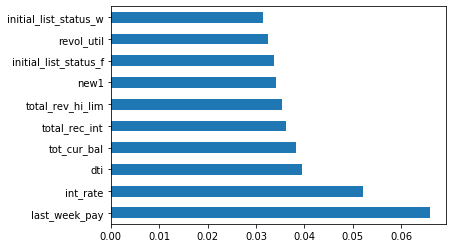

In [34]:
'''Feature Selection'''
#####1.using Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
#use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.nlargest(10))
#plot graph of feature importances for better visualization
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [35]:
'''best 10 significant variables using TreeClassifier:
batch_enrolled, int_rate, annual_inc, dti, revol_util, total_acc, total_rec_int, last_week_pay, tot_cur_bal, total_rev_hi_lim'''
X_n = X.loc[:,["revol_util","new1","total_rev_hi_lim","total_rec_int","initial_list_status_f","initial_list_status_w","dti","tot_cur_bal","int_rate","last_week_pay"]]
X_n.head()

,revol_util,new1,total_rev_hi_lim,total_rec_int,initial_list_status_f,initial_list_status_w,dti,tot_cur_bal,int_rate,last_week_pay
0,-1.67,-0.46,1.09,-0.50,1,0,-1.17,-0.81,-0.87,-0.55
1,0.22,0.53,-0.27,0.25,1,0,-0.88,-0.80,0.09,-0.01
2,-2.06,-0.87,-0.79,-0.80,0,1,-1.46,0.03,-1.59,-0.82
3,1.64,1.69,-0.44,1.84,0,1,-0.67,-0.29,2.01,-0.09
4,1.24,-1.70,-0.24,-0.38,1,0,-0.97,-0.35,-0.67,1.99


In [ ]:
'''
*******************************************************************************************************************
*******************************************************************************************************************

        Creating models with six different ML algorithms with their optimal parameters
            
*******************************************************************************************************************
*******************************************************************************************************************
'''

In [36]:
#Split train and test data:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size=0.20, random_state=0)

In [37]:
'''GradientBoosting'''

from sklearn.ensemble import GradientBoostingClassifier
#Selecting the optimal parameters values using GridSearchCV:
model = GradientBoostingClassifier(min_samples_leaf=50, min_samples_split=10, n_estimators=500)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = model.score(X_test, Y_test)
print("Score for GB:",score)

Score for GB: 0.7841172125092342


accuracy: 0.7841172125092342
error rate: 0.2158827874907658
sensitivity: 0.7318256049883703
specificity: 0.8359064843405382
precision: 0.8153947948831054


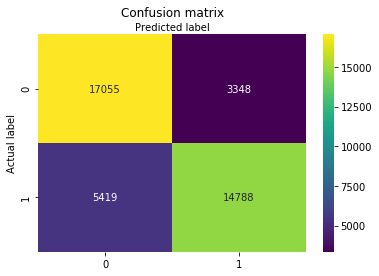

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

'''The Confusion matrix in the heatmap form for all combinations'''
fig, ax = plt.subplots()
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis",fmt='2g' )
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("accuracy:", (TP+TN)/(TP+TN+FP+FN))
print("error rate:", (FP+FN)/(TP+TN+FP+FN))
print("sensitivity:", (TP)/(TP+FN))
print("specificity:", (TN)/(TN+FP))
print("precision:", (TP)/(TP+FP))

#Getting accuracy of 85.19% using random forest